In [28]:
from functions import *
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import *
from datetime import datetime
from brokenaxes import brokenaxes

In [29]:
EPR=np.transpose(np.load('EPRArray/EPRCalibrationsV3.npy',allow_pickle=True))
hunterFitsK2=np.load('NMRDataFits/HunterKin2.npy')
windmillFits=np.load('NMRDataFits/Windmill.npy')
hunterFits=np.load('NMRDataFits/HunterKin3.npy')
fringeFits=np.load('NMRDataFits/Fringe.npy')
fits=np.load('NMRDataFits/FitsInRange.npy')

settings=np.load('NMRDataSettings/SettingsInRange.npy')
indicesInRange,datesInRange = DatesInRange('20211214_150000','20221216_120200')

In [30]:
EPR[3]

array([1.4996, 1.6264, 1.6511, 1.6664, 1.948, 1.8687, 2.0003, 1.7354,
       1.6575, 1.6477, 1.6799, 1.8464, 1.7086, 0.0, 1.7779, 0.0, 1.772,
       1.7713, 1.7206, 1.7574, 1.6408, 1.6408, 1.6032, 1.6186, 1.8525,
       1.85, 1.8529, 1.8599, 1.8692, 1.85, 1.8487, 2.2019, 2.2904, 2.2035,
       2.3109, 2.3376, 2.3769, 2.1378, 2.3259, 2.3282, 2.2275],
      dtype=object)

In [31]:
#Fit Format
#Format of output: dates,pc,us,ds,pcusx,pcdsx,pcusy,pcdsy,dsusx,dsdsx,dsusy,dsdsy,ususx,usdsx,ususy,usdsy

In [32]:
HunterCalibration2=1.6882
WindmillCalibration=1.846062151726227
HunterCalibration=2.204157792247123
FringeCalibration=1.9189

# HunterKin2

In [33]:
Hdate2=hunterFitsK2[0].astype(int).astype(str)

Hdate2_objects=[datetime.strptime(date,"%Y%m%d%H%M%S") for date in Hdate2]
Hdate2_array=np.array(Hdate2_objects)
Hsorted_dates2=np.sort(Hdate2_array)
Hindex_array2=[Hdate2_objects.index(date) for date in Hsorted_dates2]

len(Hsorted_dates2)
H2=hunterFitsK2[3][Hindex_array2]
H2pc=hunterFitsK2[1][Hindex_array2]
checkerH2=np.where(H2<25)
Hsorted_dates2=Hsorted_dates2[checkerH2]
H2=H2[checkerH2]
H2pc=H2pc[checkerH2]

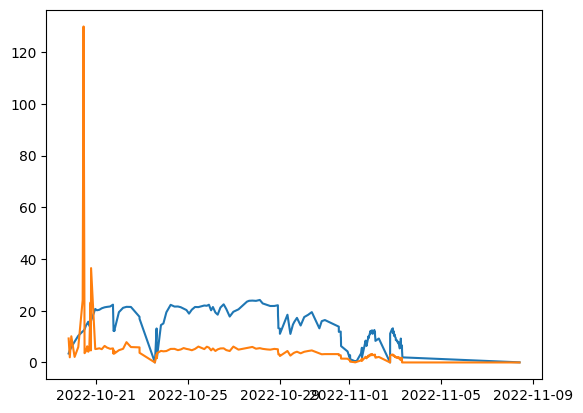

In [34]:
plt.plot(Hsorted_dates2,H2)
plt.plot(Hsorted_dates2,H2pc)

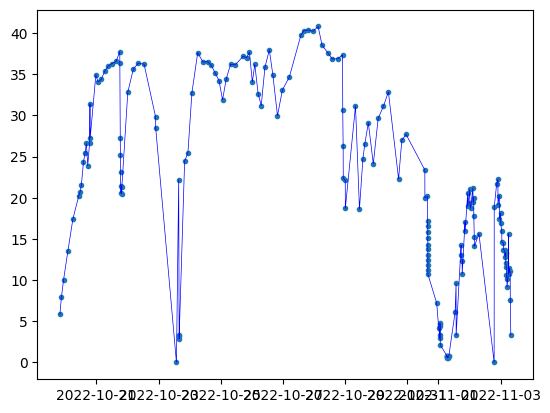

In [35]:
plt.plot(Hsorted_dates2[:-1],H2[:-1]*HunterCalibration2,'.')
plt.plot(Hsorted_dates2[:-1],H2[:-1]*HunterCalibration2,linewidth=.5,color='blue')

# Windmill

In [36]:
Wdate=windmillFits[0].astype(int).astype(str)
Wdate=np.delete(Wdate,122)

Wdate_objects = [datetime.strptime(date, "%Y%m%d%H%M%S") for date in Wdate]
Wdates_array = np.array(Wdate_objects)
Wsorted_dates = np.sort(Wdates_array)
Windex_array = [Wdate_objects.index(date) for date in Wsorted_dates]
#index_array=index_array[np.where(windmillFits[3]<60)]
#sorted_dates=sorted_dates[np.where(windmillFits[3]<60)]

(Wsorted_dates[3]-Wsorted_dates[2]).total_seconds()/3600

len(Wdate_objects)

#index_array

Wdates_array[3]-Wdates_array[0]

W=windmillFits[3][np.where(windmillFits[3]<700)]
Wpc=windmillFits[1][np.where(windmillFits[3]<700)]
np.where(W>60)
W=np.delete(W,122)
Wpc=np.delete(Wpc,122)
W=W[Windex_array]
Wpc=Wpc[Windex_array]


(W*WindmillCalibration)[122]



47.033183438315305

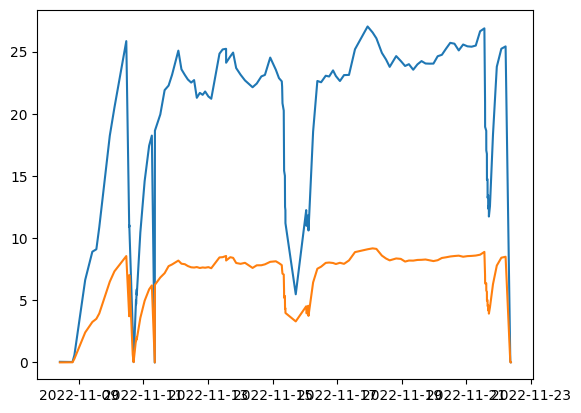

In [37]:
plt.plot(Wsorted_dates,W)
plt.plot(Wsorted_dates,Wpc)

/tmp/ipykernel_32129/4145058069.py:1: RuntimeWarning: invalid value encountered in divide
  ga=plt.hist(W/Wpc,bins=100)


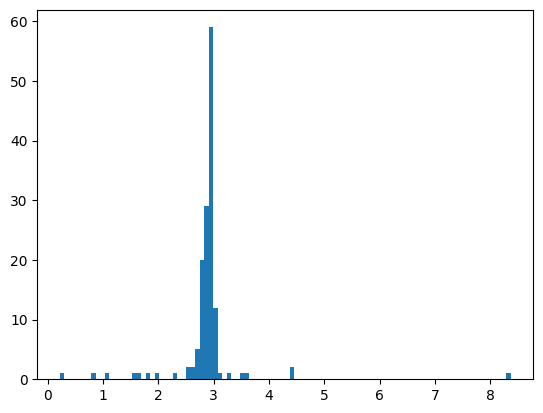

In [38]:
ga=plt.hist(W/Wpc,bins=100)

# HunterKin3

In [39]:
Hdate=hunterFits[0].astype(int).astype(str)
q=[ 21,  97, 130, 158]
Hdate=np.delete(Hdate,q)

Hdate_objects = [datetime.strptime(date, "%Y%m%d%H%M%S") for date in Hdate]
Hdates_array = np.array(Hdate_objects)
Hsorted_dates = np.sort(Hdates_array)
Hindex_array = [Hdate_objects.index(date) for date in Hsorted_dates]
#index_array=index_array[np.where(windmillFits[3]<60)]
#sorted_dates=sorted_dates[np.where(windmillFits[3]<60)]

(Hsorted_dates[3]-Hsorted_dates[2]).total_seconds()/3600

len(Hdate_objects)

#index_array

Hdates_array[3]-Hdates_array[0]

H=np.delete(hunterFits[3],q)
Hpc=np.delete(hunterFits[1],q)
np.where(H>60)
#H=np.delete(H,122)
H=H[Hindex_array]
Hpc=Hpc[Hindex_array]


#(H*HunterCalibration)[122]

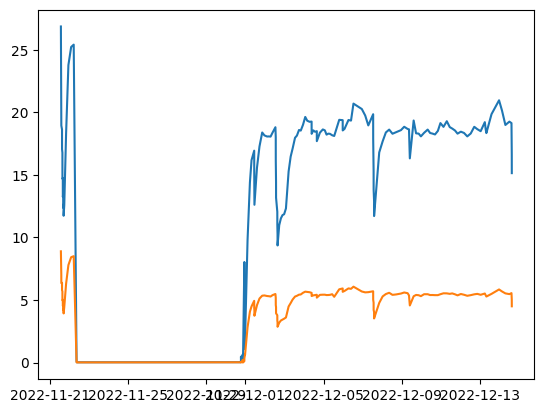

In [40]:
plt.plot(Hsorted_dates,H)
plt.plot(Hsorted_dates,Hpc)

# Fringe

In [41]:
Fdate=fringeFits[0].astype(int).astype(str)

Fdate_objects=[datetime.strptime(date,"%Y%m%d%H%M%S") for date in Fdate]
Fdate_array=np.array(Fdate_objects)
Fsorted_dates=np.sort(Fdate_array)
Findex_array=[Fdate_objects.index(date) for date in Fsorted_dates]

len(Hsorted_dates2)
F=fringeFits[3][Findex_array]
Fpc=fringeFits[1][Findex_array]
checkerF=np.where(F<33)
Fsorted_dates=Fsorted_dates[checkerF]
F=F[checkerF]
Fpc=Fpc[checkerF]

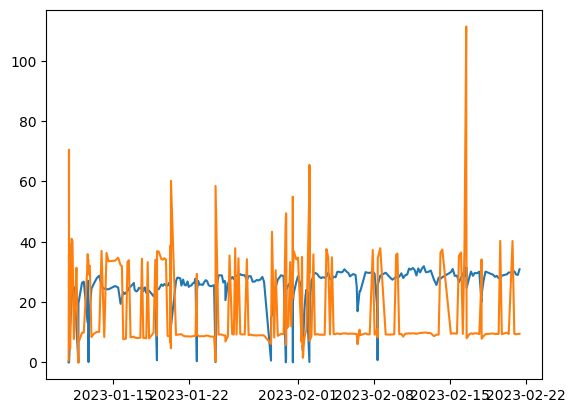

In [42]:
plt.plot(Fsorted_dates,F)
plt.plot(Fsorted_dates,Fpc)

In [43]:
len(F)

300

In [44]:
np.where(hunterFits[3]>60)

(array([ 21,  97, 130, 158]),)

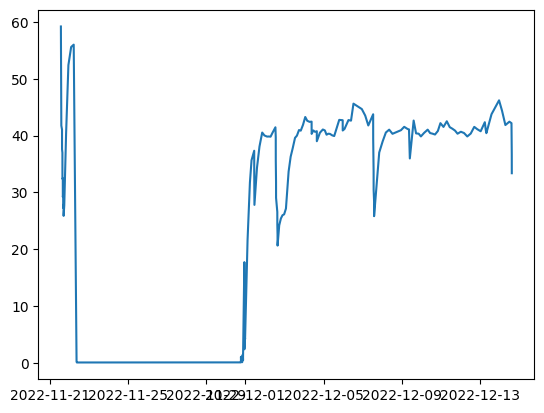

In [45]:
plt.plot(Hsorted_dates,H*HunterCalibration)

In [46]:
Wsorted_dates[0].strftime("%")

'%'

In [47]:
Wsorted_dates[-1:]
len(Wsorted_dates)

145

In [48]:
len(Hsorted_dates2)

178

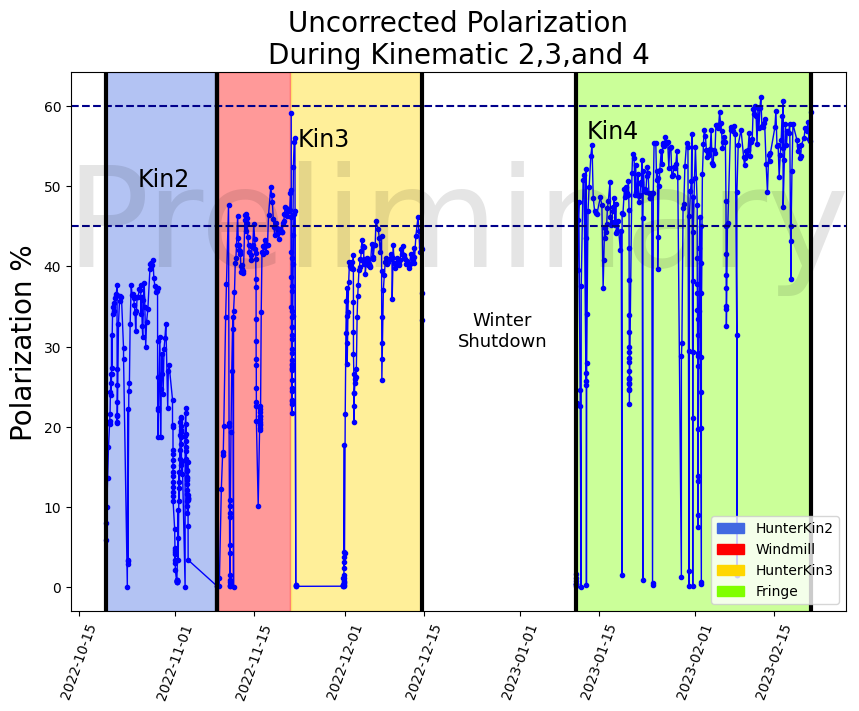

In [51]:
plt.figure(figsize=(10,7))
#baxes = brokenaxes(xlims=((0,8),(12,20)))



plt.plot(Hsorted_dates2,H2*HunterCalibration2,'.',color='blue',markersize=6)
plt.plot(Hsorted_dates2,H2*HunterCalibration2,'-',color='blue',linewidth=1)

plt.plot(Wsorted_dates,W*WindmillCalibration,'.',color='blue',markersize=6)
plt.plot(Wsorted_dates,W*WindmillCalibration,'-',color='blue',linewidth=1)

plt.plot(Hsorted_dates,H*HunterCalibration,'.',color='blue',markersize=6)
plt.plot(Hsorted_dates,H*HunterCalibration,'-',color='blue',linewidth=1)

plt.plot(Fsorted_dates,F*FringeCalibration,'.',color='blue',markersize=6)
plt.plot(Fsorted_dates,F*FringeCalibration,'-',color='blue',linewidth=1)

x=plt.xticks(rotation=70)
plt.axhline(y = 45, color = 'darkblue', linestyle = '--')
plt.axhline(y = 60, color = 'darkblue', linestyle = '--')


plt.axvspan(Hsorted_dates2[0],Hsorted_dates2[-1:][0],alpha=.4,color='royalblue',label='HunterKin2')
plt.axvline(Hsorted_dates2[0],color='black',linewidth='3')
plt.axvline(Hsorted_dates2[-1:][0],color='black',linewidth='3')


plt.axvspan(Wsorted_dates[0],Wsorted_dates[-22:-21][0],alpha=.4,color='red',label='Windmill')
plt.axvspan(Hsorted_dates[0],Hsorted_dates[-1:][0],alpha=.4,color='gold',label='HunterKin3')
plt.axvline(Wsorted_dates[0],color='black',linewidth='3')
plt.axvline(Hsorted_dates[-1:][0],color='black',linewidth='3')

plt.axvspan(Fsorted_dates[0],Fsorted_dates[-1:][0],alpha=.4,color='chartreuse',label='Fringe')
plt.axvline(Fsorted_dates[0],color='black',linewidth='3')
plt.axvline(Fsorted_dates[-1:][0],color='black',linewidth='3')

leg=plt.legend(loc='lower right')
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.text(Hsorted_dates2[int(len(Hsorted_dates2)/2)],50,'Kin2',fontsize=17,ha='center')
plt.text(Hsorted_dates[50],55,'Kin3',fontsize=17,ha='right')
plt.text(Fsorted_dates[20],56,'Kin4',fontsize=17,ha='left')
plt.text(datetime(2022, 12, 28, 22, 32, 36),30,'Winter'+'\n'+'Shutdown',fontsize=13,ha='center')
plt.text(datetime(2022, 12, 20, 22, 32, 36),40,'Preliminary',fontsize=100,ha='center',alpha=.1)


plt.ylabel('Polarization %',fontsize=20)
plt.title('Uncorrected Polarization'+'\n''During Kinematic 2,3,and 4',fontsize=20)

plt.savefig('UncorrectedPolarization.png')

In [50]:
Fsorted_dates[0]

datetime.datetime(2023, 1, 10, 22, 32, 36)